In [4]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.style as style
%matplotlib inline

In [5]:
data = pd.read_csv('tweet_word_cloud.csv')
data.shape # We have 1339 latest tweets 

(1339, 34)

In [6]:
# Lets clean the tweet data using regular expressions
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    return text

In [7]:
# We are just concerned with the tweet text labeled as 'tweet' in our dataframe
data.tweet = data.tweet.apply(clean_text)

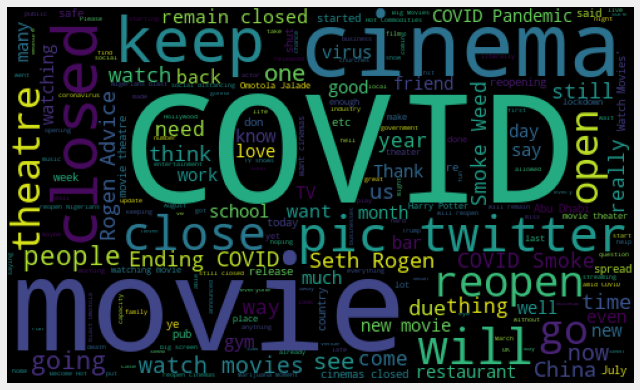

In [12]:
style.use('fivethirtyeight')

words = ' '.join([tweet for tweet in data.tweet]) 
words = words.replace('weed', '').replace('smoke', '')
# Generating the WordCloud from our list of words 

cloud = WordCloud(width=500, height=300, random_state = 30, max_font_size=120).generate(words)
plt.figure(figsize=(10,10))
# imshow is good for plotting images 
plt.imshow(cloud)

# lets take off the x and y axis
plt.axis('off')
plt.savefig('Word Cloud.png');
plt.show();

# WordCloud
---
- The search terms we filtered for in the Twint API was, covid, cinemas, theatres, and movies.
  - After installing Twint I passed " twint -s 'covid AND cinemas OR theatres OR movies' "
  - To save it to a csv file locally I also passed " -o <file_name>.csv --csv "
  - We did this so that our results only showed user bias, not ours. If we searched for, say, 
    'reopen' then we get biased/skewed results. The same idea goes for 'stay closed'
- We can visualize that 'reopen' came up in the search on its own many times. 
- However, 'remain closed' did too! 
- Twitter users seem conflicted! How could this impact our decisions? 